In [2]:
import sys
import pandas
import matplotlib
import seaborn
import sklearn

print(sys.version)
print(pandas.__version__)
print(matplotlib.__version__)
print(seaborn.__version__)
print(sklearn.__version__)

3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]
0.20.3
2.2.3
0.9.0
0.19.2


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
# load the data
games = pandas.read_csv("games.csv")

In [5]:
#print the names of the columns in games
print(games.columns)
print(games.shape)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


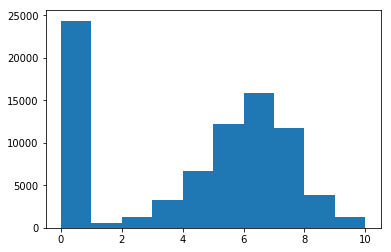

In [6]:
#make histogram of all ratings in average_rating column
plt.hist(games["average_rating"])
plt.show()

In [8]:
#print the first row of all the games with zero scores
print(games[games["average_rating"]==0].iloc[0])

#print the first row of games with scores greater than zero
print(games[games["average_rating"]>0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime          

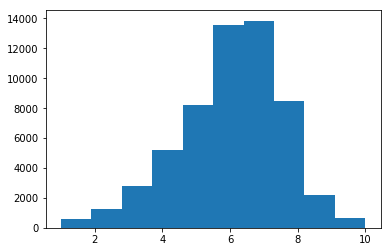

In [9]:
#remove any rows without user reviews
games = games[games["users_rated"]>0]

#remove any rows with missing values
games = games.dropna(axis=0)

#make a histogram of all average ratings
plt.hist(games["average_rating"])
plt.show()

In [10]:
print(games.columns)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


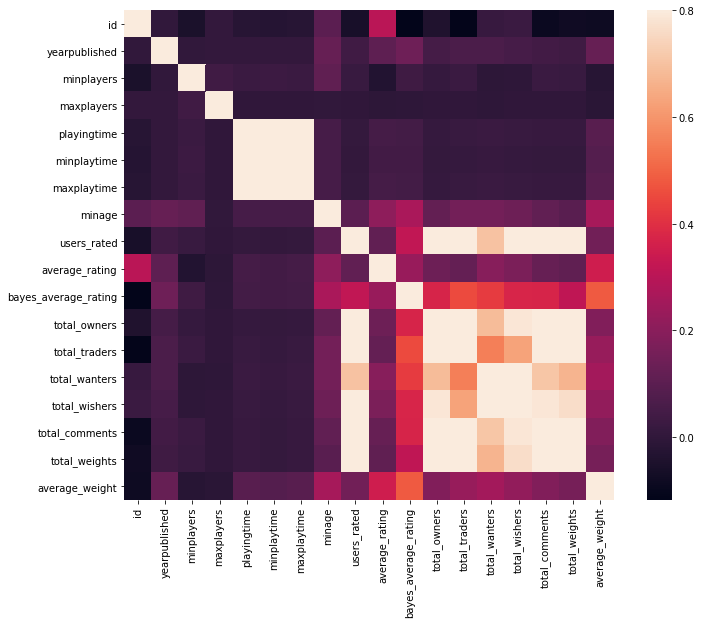

In [11]:
#correlation matrix
corrmat = games.corr()
fig = plt.figure(figsize = (12,9))

sns.heatmap(corrmat, vmax =.8, square= True)
plt.show()

In [12]:
#get all cols from df
columns = games.columns.tolist()

#filter to remove unwanted data
columns = [c for c in columns if c not in ["bayes_average_rating","average_rating","type","name","id"]]

#store the variable w'll be predicting on
target = "average_rating"

In [14]:
#generate training and test datasets
from sklearn.model_selection import train_test_split
#generate training set
train = games.sample(frac=0.8,random_state=1)
#select anything not in the training set and put it in test set
test = games.loc[~games.index.isin(train.index)]

#print shapes
print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


In [16]:
#import linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#initialize the model class
LR = LinearRegression()

#fit the model to training data
LR.fit(train[columns],train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
#generate predictions from the test set
predictions = LR.predict(test[columns])

#compute error btwn test predictions and actual values
mean_squared_error(predictions, test[target])

2.078787951805687

In [18]:
#import random forest model
from sklearn.ensemble import RandomForestRegressor

#initialize the model
RFR = RandomForestRegressor(n_estimators = 100, min_samples_leaf=10, random_state=1)

#fit to data
RFR.fit(train[columns], train[target])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [19]:
#make predictions
predictions = RFR.predict(test[columns])

#compute the error btwn test and actual values
mean_squared_error(predictions,test[target])

1.4458564605687358

In [20]:
test[columns].iloc[0]

yearpublished      2011.0000
minplayers            2.0000
maxplayers            6.0000
playingtime         200.0000
minplaytime          60.0000
maxplaytime         200.0000
minage               14.0000
users_rated       15709.0000
total_owners      17611.0000
total_traders       273.0000
total_wanters      1108.0000
total_wishers      5581.0000
total_comments     3188.0000
total_weights      1486.0000
average_weight        3.6359
Name: 9, dtype: float64

In [21]:
#make prediction with both models
rating_LR = LR.predict(test[columns].iloc[0].values.reshape(1,-1))
rating_RFR = RFR.predict(test[columns].iloc[0].values.reshape(1,-1))

#print both predictions
print(rating_LR)
print(rating_RFR)

[8.12150128]
[7.91373581]


In [22]:
#
test[target].iloc[0]

8.07933